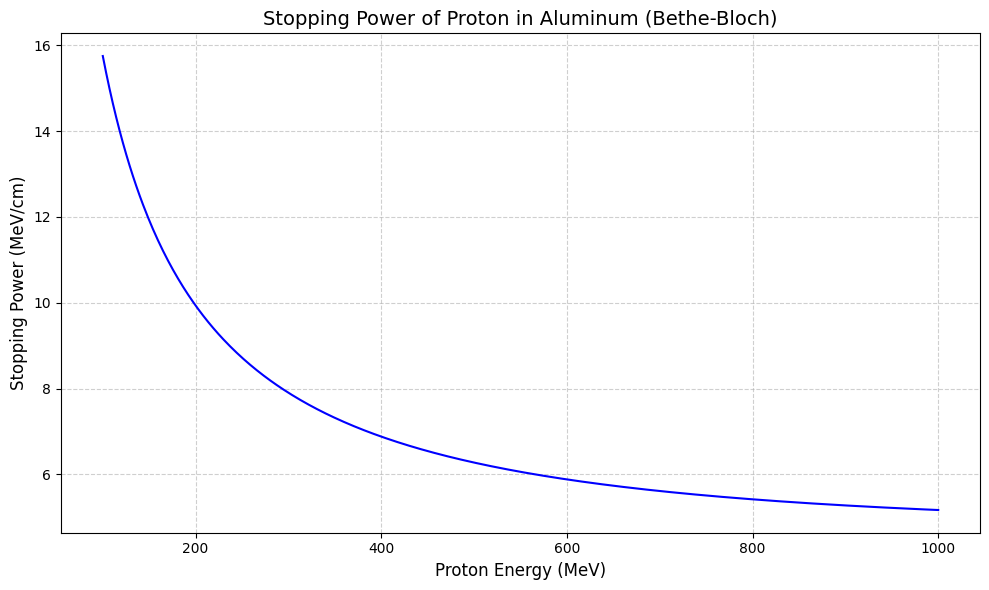

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Constants
k = 0.307  # MeV*cm²/mol
me = 0.511  # MeV (electron mass)
mp = 938.27  # MeV (proton mass)
rho = 2.7  # g/cm³ (aluminum density)

# Material properties (Aluminum)
zp = 1     # Charge of proton
zm = 13    # Atomic number of material
am = 26.98 # Atomic mass of aluminum
i = 166e-6 # Mean excitation potential in MeV (166 eV = 166e-6 MeV)

# Gamma calculation
def gammacal(e):
    return 1 + e / mp

# Beta calculation
def betacal(gamma):
    return math.sqrt(1 - 1 / gamma**2)

# Bethe-Bloch function
def bethe_bloch(z_particle, beta, z_material, A_material, i):
    gamma = 1 / math.sqrt(1 - beta**2)
    arg = (2 * me * beta**2 * gamma**2) / i
    term = math.log(arg)
    dedx = k * (z_particle**2 / beta**2) * (z_material / A_material) * term
    return dedx

# Energy range (in MeV)
energies = np.linspace(100, 1000, 500)
stopping_p = []

for e in energies:
    gamma = gammacal(e)
    beta = betacal(gamma)
    dedx_p = bethe_bloch(zp, beta, zm, am, i)
    stopping_p.append(dedx_p * rho)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(energies, stopping_p, color='blue')
plt.title('Stopping Power of Proton in Aluminum (Bethe-Bloch)', fontsize=14)
plt.xlabel('Proton Energy (MeV)', fontsize=12)
plt.ylabel('Stopping Power (MeV/cm)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


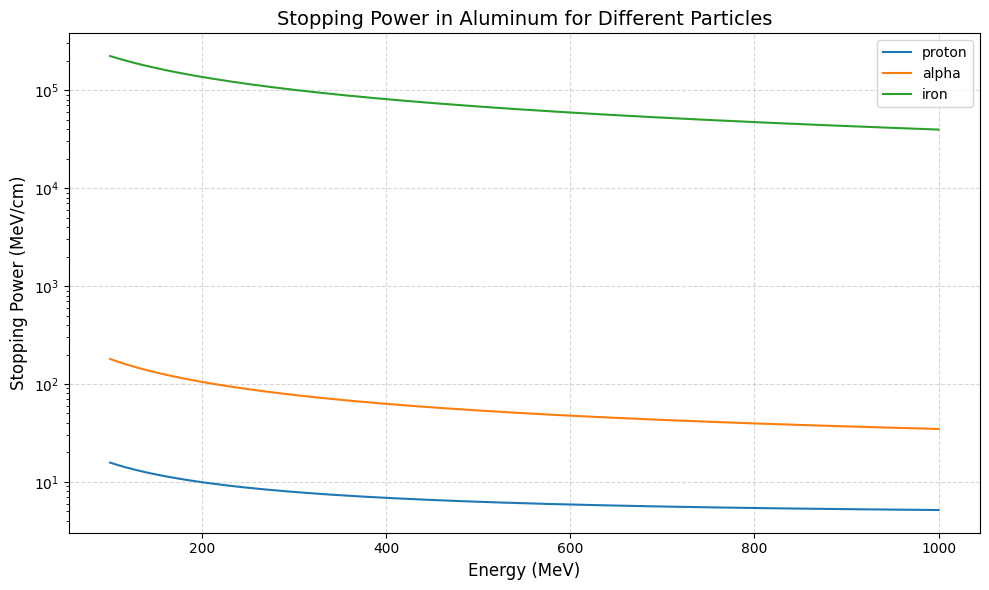

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Constants
k = 0.307  # MeV*cm²/mol
me = 0.511  # MeV (electron mass)
rho = 2.7  # g/cm³ (aluminum density)

# Material properties (Aluminum)
zm = 13       # Atomic number of material
am = 26.98    # Atomic mass of aluminum
i = 166e-6    # Mean excitation potential in MeV (166 eV = 166e-6 MeV)

# Define particles: name -> charge (z), mass (MeV)
particles = {
    "proton": {"z": 1, "mass": 938.27},
    "alpha": {"z": 2, "mass": 3727.38},
    "iron": {"z": 26, "mass": 52000}  # Approx for Fe nucleus
}

# Gamma calculation
def gammacal(e, m):
    return 1 + e / m

# Beta calculation
def betacal(gamma):
    return math.sqrt(1 - 1 / gamma**2)

# Bethe-Bloch function
def bethe_bloch(z_particle, beta, z_material, A_material, i):
    gamma = 1 / math.sqrt(1 - beta**2)
    arg = (2 * me * beta**2 * gamma**2) / i
    term = math.log(arg)
    dedx = k * (z_particle**2 / beta**2) * (z_material / A_material) * term
    return dedx

# Energy range
energies = np.linspace(100, 1000, 500)

# Plot stopping power for each particle
plt.figure(figsize=(10, 6))

for name, par in particles.items():
    z_particle = par['z']
    mass_particle = par['mass']
    stopping = []
    for e in energies:
        gamma = gammacal(e, mass_particle)
        beta = betacal(gamma)
        dedx = bethe_bloch(z_particle, beta, zm, am, i)
        stopping.append(dedx * rho)
    plt.plot(energies, stopping, label=name)

# Plot formatting
plt.title('Stopping Power in Aluminum for Different Particles', fontsize=14)
plt.xlabel('Energy (MeV)', fontsize=12)
plt.ylabel('Stopping Power (MeV/cm)', fontsize=12)
plt.yscale('log')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
